In [249]:
import numpy as np 
import matplotlib.pyplot as plt
import gym
from gym.envs.toy_text.cliffwalking import CliffWalkingEnv

def E_greedy_policy(Q,s,eps):
    
    if np.random.uniform(0,1)<eps:
        return np.random.choice(Q.shape[1])
    else:
        return np.argmax(Q[s])
        
def SARSA(env,alpha,gamma,eps,num_episodes,eps_decay):
    number_actions=env.nA
    number_states=env.nS
    Q=np.zeros((number_states, number_actions))
    rewards_per_episodes=[]
    visits=np.zeros(48)
    
    for i in range(num_episodes):
        
        tot_reward=0
        done=False
        state=env.reset()
        
        if eps>0.01:
            eps=eps-eps_decay
            
        
        
        while not done:
            
            action=E_greedy_policy(Q,state,eps)
            
            next_state, rew, done,_ = env.step(action)
            
            next_action = E_greedy_policy(Q, next_state, eps) 
            
            Q[state][action] = Q[state][action] + alpha*(rew + gamma*Q[next_state][next_action] - Q[state][action])
            
            if i> num_episodes-10:
                visits[state]+=1
            
            state = next_state
            action = next_action
            tot_reward+= rew
            if done:
                rewards_per_episodes.append(tot_reward)
                if i> num_episodes-10:
                  visits[state]+=1
                
    return Q, rewards_per_episodes,visits
def Q_learning(env,alpha,gamma,eps,num_episodes,eps_decay):
    number_actions=env.nA
    number_states=env.nS
    Q=np.zeros((number_states, number_actions))
    rewards_per_episodes=[]
    visits=np.zeros(48)
    
    for i in range(num_episodes):
        
        tot_reward=0
        done=False
        state=env.reset()
        
        if eps>0.01:
            eps=eps-eps_decay
            
        
        
        while not done:
            
            action=E_greedy_policy(Q,state,eps)
            
            next_state, rew, done,_ = env.step(action)
            
            next_action = E_greedy_policy(Q, next_state, eps) 
            
            Q[state][action] = Q[state][action] + alpha*(rew + gamma*np.max(Q[next_state]) - Q[state][action])
            
            if i> num_episodes-10:
                visits[state]+=1
            
            state = next_state
            action = next_action
            tot_reward+= rew
            if done:
                rewards_per_episodes.append(tot_reward)
                if i> num_episodes-10:
                  visits[state]+=1
                
    return Q, rewards_per_episodes,visits
    

In [250]:
if __name__ == '__main__':
    env = CliffWalkingEnv()
    Q_sarsa,rewards_per_episodes_sarsa,v_sarsa=SARSA(env,0.1,0.95,0.3,2000,0.005)
    Q_Q_learning,rewards_per_episodes_Q_learning,v_Q_learning=Q_learning(env,0.1,0.95,0.3,2000,0.005)
    

Text(0.5, 1.0, 'sum_rewards_Q_learning')

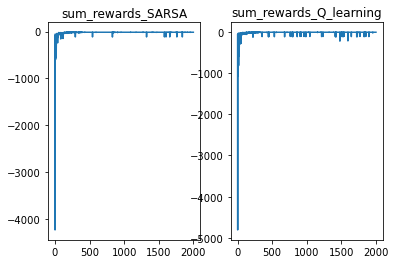

In [252]:
plt.subplot(1,2,1)
plt.plot(rewards_per_episodes_sarsa)
plt.title("sum_rewards_SARSA")
plt.subplot(1,2,2)
plt.plot(rewards_per_episodes_Q_learning)
plt.title("sum_rewards_Q_learning")

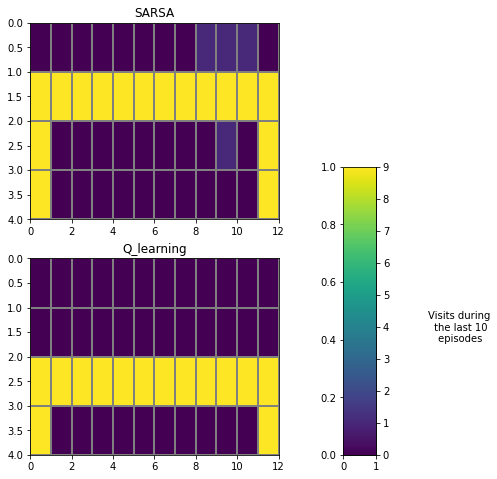

In [255]:

grid_state_visits_sarsa = v_sarsa.reshape((4,12))
grid_state_visits_Q_learning = v_Q_learning.reshape((4,12))
plt.subplot(211)
po1=plt.pcolormesh(grid_state_visits_sarsa, edgecolors='gray', linewidth=2)
at1 = po1.axes
at1.invert_yaxis()

plt.title("SARSA")
cm = plt.get_cmap()
plt.subplots_adjust(bottom=0.0, right=0.7, top=1.0)
cax = plt.axes([0.85, 0.0, 0.075, 1.])

plt.subplot(212)
po2=plt.pcolormesh(grid_state_visits_Q_learning, edgecolors='gray', linewidth=2)
at2 = po2.axes
at2.invert_yaxis()

plt.title("Q_learning")
cm = plt.get_cmap()
plt.subplots_adjust(bottom=0.0, right=0.7, top=1.5)
cax = plt.axes([0.85, 0.0, 0.075, 1.])

cbar = plt.colorbar(cax=cax)
cbar.ax.set_ylabel("Visits during\n the last 10\n episodes", rotation=0, labelpad=70)
plt.show()